In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
data_dir = 'dataset2'
BATCH_SIZE = 32
IMG_SIZE = (350,350)

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

Found 2383 files belonging to 2 classes.
Using 1907 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

Found 2383 files belonging to 2 classes.
Using 476 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['No', 'Yes']


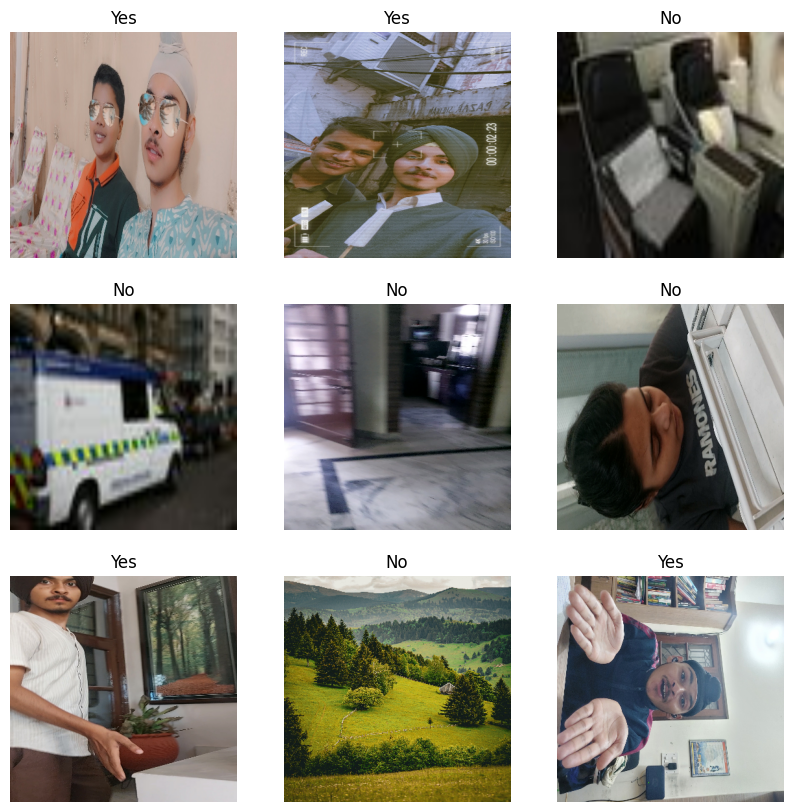

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 350, 350, 3)
(32,)


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model architecture
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.5),
    layers.Dense(2, activation='softmax')  # Output layer for 2 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=30)

# Evaluate the model
loss0, accuracy0 = model.evaluate(val_ds)
print(f"Initial loss: {loss0:.2f}")
print(f"Initial accuracy: {accuracy0:.2f}")


Epoch 1/30
60/60 [==============================] - 9s 136ms/step - loss: 0.8166 - accuracy: 0.6356 - val_loss: 0.5922 - val_accuracy: 0.7374
Epoch 2/30
60/60 [==============================] - 8s 134ms/step - loss: 0.5210 - accuracy: 0.7598 - val_loss: 0.4875 - val_accuracy: 0.7647
Epoch 3/30
60/60 [==============================] - 8s 132ms/step - loss: 0.4314 - accuracy: 0.8154 - val_loss: 0.4250 - val_accuracy: 0.8214
Epoch 4/30
60/60 [==============================] - 8s 134ms/step - loss: 0.3006 - accuracy: 0.8852 - val_loss: 0.3129 - val_accuracy: 0.8634
Epoch 5/30
60/60 [==============================] - 8s 135ms/step - loss: 0.1960 - accuracy: 0.9255 - val_loss: 0.3339 - val_accuracy: 0.8866
Epoch 6/30
60/60 [==============================] - 8s 134ms/step - loss: 0.1386 - accuracy: 0.9533 - val_loss: 0.3698 - val_accuracy: 0.8782
Epoch 7/30
60/60 [==============================] - 8s 133ms/step - loss: 0.1212 - accuracy: 0.9586 - val_loss: 0.3565 - val_accuracy: 0.8782
Epoch 

In [12]:
# Check the shape of the data batches
for images, labels in train_ds.take(1):
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")

# Training the model
history = model.fit(train_ds, validation_data=val_ds, epochs=20)

# Evaluating the model
loss0, accuracy0 = model.evaluate(val_ds)
print(f"Initial loss: {loss0:.2f}")
print(f"Initial accuracy: {accuracy0:.2f}")

# Make predictions and check confusion matrix
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred = np.argmax(model.predict(val_ds), axis=1)

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


Image batch shape: (32, 350, 350, 3)
Label batch shape: (32,)
Epoch 1/20
60/60 [==============================] - 8s 131ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.7790 - val_accuracy: 0.9013
Epoch 2/20
60/60 [==============================] - 8s 132ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.7924 - val_accuracy: 0.8950
Epoch 3/20
60/60 [==============================] - 8s 131ms/step - loss: 0.0041 - accuracy: 0.9984 - val_loss: 0.8883 - val_accuracy: 0.8845
Epoch 4/20
60/60 [==============================] - 8s 131ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.6813 - val_accuracy: 0.8908
Epoch 5/20
60/60 [==============================] - 8s 132ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.7043 - val_accuracy: 0.9034
Epoch 6/20
60/60 [==============================] - 8s 131ms/step - loss: 0.0067 - accuracy: 0.9974 - val_loss: 0.9361 - val_accuracy: 0.8887
Epoch 7/20
60/60 [==============================] - 8s 131ms/step - loss: 0.0107 - acc

NameError: name 'confusion_matrix' is not defined

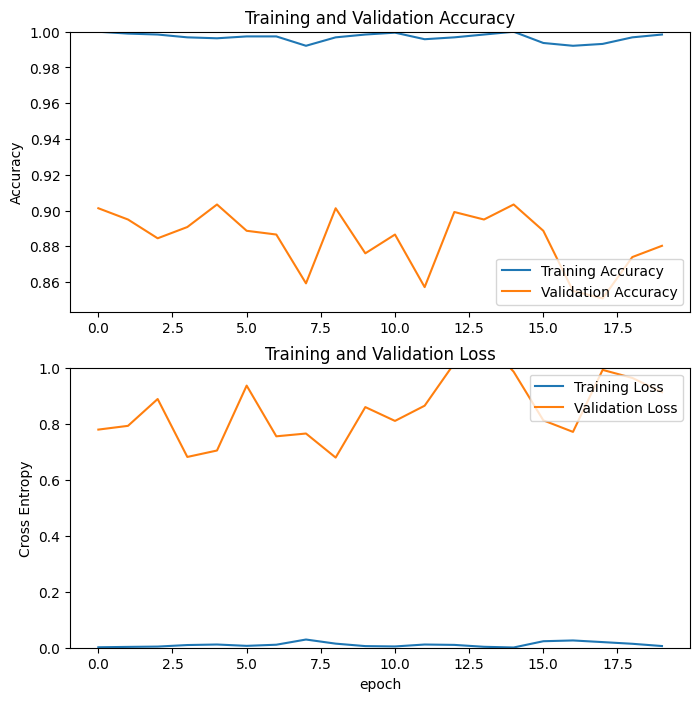

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [21]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Assuming you have already defined and trained the model
IMG_SIZE = (350, 350)

def load_image(img_path, img_size):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

def predict_image(model, img_path, img_size):
    img_array = load_image(img_path, img_size)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class, predictions

class_names = ['No', 'Yes']  # Adjust according to your classes

def get_label(predicted_class):
    return class_names[predicted_class[0]]

# Example usage
img_path = 'img2.jpg'
predicted_class, predictions = predict_image(model, img_path, IMG_SIZE)
label = get_label(predicted_class)

print(f"Predicted class: {label}")
print(f"Prediction probabilities: {predictions}")


1/1 [==============================] - 0s 20ms/step
Predicted class: Yes
Prediction probabilities: [[0.18045305 0.81954694]]
